In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('/content/Mall_Customers.csv')
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


Text(0, 0.5, 'Spending Score (1-100)')

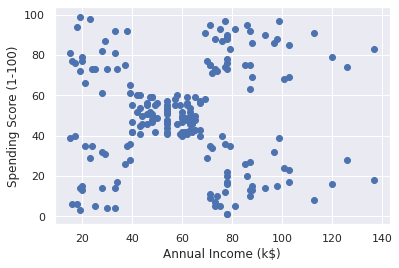

In [5]:
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

In [11]:
x = data.drop(['CustomerID','Gender','Age'], axis=1)
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [13]:
wcss=[]

for i in range(1,11):
  kmeans= KMeans(i)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

Text(0, 0.5, 'wcss')

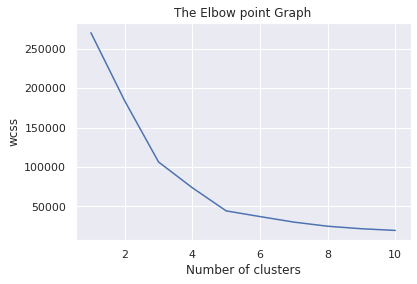

In [16]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow point Graph')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')

In [17]:
kmeans = KMeans(5)
kmeans.fit(x)
cluster = x.copy()
cluster['cluster_pred'] = kmeans.fit_predict(x)

In [18]:
cluster

,Annual Income (k$),Spending Score (1-100),cluster_pred
0,15,39,3
1,15,81,0
2,16,6,3
3,16,77,0
4,17,40,3
...,...,...,...
195,120,79,4
196,126,28,2
197,126,74,4
198,137,18,2


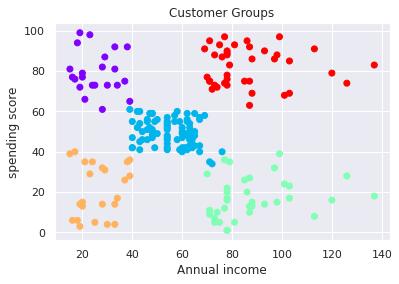

In [22]:
plt.scatter(cluster['Annual Income (k$)'],cluster['Spending Score (1-100)'],c=cluster['cluster_pred'],cmap='rainbow')
plt.title('Customer Groups')
plt.xlabel('Annual income')
plt.ylabel('spending score')
plt.show()